# Wrangle and Analyze Data

## Gathering

**Step #1:** Download `twitter-archive-enhanced.csv` manually.

In [1]:
# packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import tweepy
import json
import time

% matplotlib inline
% config InlineBackend.figure_format = 'retina'

In [2]:
# read csv file into dataframe
t_archive = pd.read_csv('twitter-archive-enhanced.csv')

# dataframe shape (rows, columns)
t_archive.shape

(2356, 17)

In [3]:
# first 3 rows in t_archive
t_archive.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


**Step #2:** Download `image-predictions.tsv` programmatically using the ***requests*** library

In [4]:
# download file from url
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
response

<Response [200]>

In [5]:
# write file to current directory
with open(url.split('/')[-1], mode='wb') as file:
    file.write(response.content)

In [6]:
# read the downloaded tsv file
i_pred = pd.read_csv('image-predictions.tsv', sep='\t')

# dataframe shape (rows, columns)
print(i_pred.shape)

# show first 3 rows
i_pred.head(3)

(2075, 12)


,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True


**Step #3:** Create JSON file `tweet-json.txt` by querying Twitter API using the ***Tweepy*** library

In [7]:
############### AUTHENTICATION REMOVED ################
# consumer_key = 'consumer_key'
# consumer_secret = 'consumer_secret'
# access_token = 'access_token'
# access_secret = 'access_secret'

# auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [8]:
############### COMMENT OUT TO AVOID UNNECESSARY 30 MINUTE CODE RUN, FILE IS CREATED ################
# calculating the elapsed time after each response
# start time
# start = time.time()

# list of json objects for each tweet_id
# df_list = []

# fetch retweet_count and favorite_count by tweet_id
# for row in t_archive['tweet_id']:
#     try:
        # getting information needed from Twitter API
#         tweet = api.get_status(row, tweet_mode='extended')
#         tweet_id = tweet._json['id']
#         print(tweet_id)
#         retweet_count = tweet._json['retweet_count']
#         favorite_count = tweet._json['favorite_count']

        # appending json object to list
#         df_list.append({'tweet_id': tweet_id, 
#                         'retweet_count': retweet_count,
#                         'favorite_count': favorite_count})

        # end time
#         end = time.time()
        # elapsed time
#         print("time: {0}".format(end - start))

#     except tweepy.TweepError as e:
#         print(e)


In [9]:
############# COMMENT OUT TO PREVENT RECREATING FILE ###############
# writing json object in text file line by line
# for el in df_list:
#     with open('tweet-json.txt', 'a') as outfile:  
#         json.dump(el, outfile)
#         outfile.write('\n')

In [10]:
# list to append tweet objects to
df_list = []

# read each line in txt file and append to df_list
with open('tweet-json.txt', 'r') as file:
    lines = file.readlines()
    for line in lines:
        line_obj = line.split(',')
        tweet_id = line_obj[0][len('{"tweet_id": '):]
        retweet_count = line_obj[1][len('"retweet_count": '):]
        favorite_count = line_obj[2][len('"favorite_count": '):-2]
        # append object to df_list
        df_list.append({'tweet_id': tweet_id, 
                        'retweet_count': retweet_count,
                        'favorite_count': favorite_count})

In [11]:
# create dataframe from df_list
t_api = pd.DataFrame(df_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])

In [12]:
# save to csv file
t_api.to_csv('twitter-api-results.csv', index=False)

In [13]:
# print shape of dataframe
print(t_api.shape)

# check the first 3 rows of dataframe
t_api.head(3)

(2341, 3)


,tweet_id,retweet_count,favorite_count
0,892420643555336193,8374,38228
1,892177421306343426,6184,32771
2,891815181378084864,4092,24682


## Assessing

**Step #1:** Visual assessment

In [14]:
# explore all 3 tables (t_archive, i_pred, t_api)
#t_archive

In [15]:
#i_pred

In [16]:
#t_api

**Step #2:** Programmatic assessment

In [17]:
# explore dataframe info for all 3 tables
t_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [18]:
i_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
t_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2341 entries, 0 to 2340
Data columns (total 3 columns):
tweet_id          2341 non-null object
retweet_count     2341 non-null object
favorite_count    2341 non-null object
dtypes: object(3)
memory usage: 54.9+ KB


In [20]:
# check for duplicate columns across dataframes (from Udacity solutions)
columns = pd.Series(list(t_archive) + list(t_api) + list(i_pred))
columns[columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

In [21]:
# check for duplicate rows
sum(t_archive.duplicated()), sum(t_api.duplicated()), sum(i_pred.duplicated())

(0, 0, 0)

In [22]:
# check for duplicate ids
print(t_archive['tweet_id'].value_counts().head(2))
print(i_pred['tweet_id'].value_counts().head(2))
print(t_api['tweet_id'].value_counts().head(2))

749075273010798592    1
741099773336379392    1
Name: tweet_id, dtype: int64
685532292383666176    1
826598365270007810    1
Name: tweet_id, dtype: int64
666293911632134144    1
667902449697558528    1
Name: tweet_id, dtype: int64


In [23]:
# check validity of data
t_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [24]:
# find numerators that equal 0
t_archive[t_archive['rating_numerator'] == 0]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
315,835152434251116546,NaN,NaN,2017-02-24 15:40:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you're so blinded by your systematic plag...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/835152434...,0,10,None,None,None,None,None
1016,746906459439529985,7.468859e+17,4.196984e+09,2016-06-26 03:22:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...","PUPDATE: can't see any. Even if I could, I cou...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/746906459...,0,10,None,None,None,None,None


In [25]:
# find numerators that are < 10 and not 0
t_archive[(t_archive['rating_numerator'] < 10) & (t_archive['rating_numerator'] != 0)].head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
45,883482846933004288,NaN,NaN,2017-07-08 00:28:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bella. She hopes her smile made you sm...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/883482846...,5,10,Bella,None,None,None,None
229,848212111729840128,NaN,NaN,2017-04-01 16:35:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jerry. He's doing a distinguished tong...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/848212111...,6,10,Jerry,None,None,None,None
387,826598799820865537,8.265984e+17,4.196984e+09,2017-02-01 01:11:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...","I was going to do 007/10, but the joke wasn't ...",NaN,NaN,NaN,NaN,7,10,None,None,None,None,None
462,817502432452313088,NaN,NaN,2017-01-06 22:45:43 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Herschel. He's slightly bi...,6.924173e+17,4.196984e+09,2016-01-27 18:42:06 +0000,https://twitter.com/dog_rates/status/692417313...,7,10,Herschel,None,None,pupper,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None


In [26]:
# investigate denominator values
print(t_archive['rating_denominator'].sort_values(ascending=False).head(5))
print(t_archive['rating_denominator'].sort_values().head(5))
print(t_archive['rating_denominator'].describe()[['mean', 'min', 'max']]) # all should be 10

1120    170
902     150
1634    130
1779    120
1635    110
Name: rating_denominator, dtype: int64
313      0
2335     2
516      7
1576    10
1575    10
Name: rating_denominator, dtype: int64
mean     10.455433
min       0.000000
max     170.000000
Name: rating_denominator, dtype: float64


In [27]:
# find tweets with no rating
sum(t_archive['rating_denominator'].isnull()), sum(t_archive['rating_numerator'].isnull())

(0, 0)

In [28]:
# check last tweet is before August 1st, 2017 (image-prediction algorithm accessibility limitation)
t_archive['timestamp'].sort_values(ascending=False).head()

0    2017-08-01 16:23:56 +0000
1    2017-08-01 00:17:27 +0000
2    2017-07-31 00:18:03 +0000
3    2017-07-30 15:58:51 +0000
4    2017-07-29 16:00:24 +0000
Name: timestamp, dtype: object

## Cleaning
**Step #1:** Quality

In [29]:
# copy dataframes
t_archive_clean = t_archive.copy()
i_pred_clean = i_pred.copy()
t_api_clean = t_api.copy()

In [30]:
# change data types
# tweet_id as str in t_archive and i_pred
t_archive_clean['tweet_id'] = t_archive_clean['tweet_id'].astype(str)
i_pred_clean['tweet_id'] = i_pred_clean['tweet_id'].astype(str)

# check if datatype converted to string
print(t_archive_clean['tweet_id'].dtype, i_pred_clean['tweet_id'].dtype)

object object


In [31]:
# timestamp to date in t_archive table
t_archive_clean['timestamp'] = pd.to_datetime(t_archive_clean['timestamp'])

# check if datatype is datetime
print(t_archive_clean['timestamp'].dtype)

datetime64[ns]


In [32]:
# retweet_count & favorite_count to int
t_api_clean['retweet_count'] = pd.to_numeric(t_api_clean['retweet_count'], errors='coerce')
t_api_clean['retweet_count'] = t_api_clean['retweet_count'].fillna(0).astype('int64')

t_api_clean['favorite_count'] = pd.to_numeric(t_api_clean['favorite_count'], errors='coerce')
t_api_clean['favorite_count'] = t_api_clean['favorite_count'].fillna(0).astype('int64')

print(t_api_clean['retweet_count'].dtype, t_api_clean['favorite_count'].dtype)

int64 int64


In [33]:
# check data type
t_api_clean['retweet_count'].head()

0    8374
1    6184
2    4092
3    8513
4    9220
Name: retweet_count, dtype: int64

In [34]:
# alter column names in i_pred
i_pred_clean = i_pred_clean.rename(columns={'p1': 'predict1', 'p2': 'predict2', 'p3': 'predict3',
                                          'p1_conf': 'predict1_conf', 'p2_conf': 'predict2_conf', 
                                          'p3_conf': 'predict3_conf', 'p1_dog': 'predict1_dog', 
                                          'p2_dog': 'predict2_dog', 'p3_dog': 'predict3_dog'})

# check results
i_pred_clean.columns

Index(['tweet_id', 'jpg_url', 'img_num', 'predict1', 'predict1_conf',
       'predict1_dog', 'predict2', 'predict2_conf', 'predict2_dog', 'predict3',
       'predict3_conf', 'predict3_dog'],
      dtype='object')

In [35]:
# rating_numerator below 10 altered by adding 10
mask = (t_archive_clean['rating_numerator'] < 10) & (t_archive_clean['rating_numerator'] != 0)
t_archive_clean.loc[mask,'rating_numerator'] = t_archive_clean['rating_numerator'] + 10

# delete rating_numerator == 0
t_archive_clean.drop([315, 1016], inplace=True)


In [36]:
# check deletion results
t_archive_clean.query('rating_numerator < 10')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [37]:
# change denominators greater than 10 to 10
mask2 = (t_archive_clean['rating_denominator'] > 10) | (t_archive_clean['rating_denominator'] < 10)
t_archive_clean['rating_denominator'].where(~mask2, other=10, inplace=True)

# check results
t_archive_clean['rating_denominator'].value_counts()

10    2354
Name: rating_denominator, dtype: int64

In [38]:
# extract source and substitute link
t_archive_clean['source'] = t_archive_clean['source'].str.split('>', 1).str[-1].str[:-4]

In [39]:
# check results
t_archive_clean.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None


In [40]:
# dog names to lowercase
t_archive_clean['name'] = t_archive_clean['name'].str.lower()

In [41]:
# check results after changing lowercase
t_archive_clean['name'].value_counts().head()

none       743
a           55
charlie     12
cooper      11
oliver      11
Name: name, dtype: int64

In [42]:
# dog breeds to lowercase
i_pred_clean['predict1'] = i_pred_clean['predict1'].str.lower()
i_pred_clean['predict2'] = i_pred_clean['predict2'].str.lower()
i_pred_clean['predict3'] = i_pred_clean['predict3'].str.lower()

In [43]:
print(i_pred_clean['predict1'].value_counts().head())
print(i_pred_clean['predict2'].value_counts().head())
print(i_pred_clean['predict3'].value_counts().head())

golden_retriever      150
labrador_retriever    100
pembroke               89
chihuahua              83
pug                    57
Name: predict1, dtype: int64
labrador_retriever    104
golden_retriever       92
cardigan               74
chihuahua              44
pomeranian             42
Name: predict2, dtype: int64
labrador_retriever    79
chihuahua             58
golden_retriever      48
eskimo_dog            38
kelpie                35
Name: predict3, dtype: int64


**Step #2:** Tidiness

In [44]:
# merge rows where tweet_id in t_api exist in t_archive dataframe
t_archive_clean = t_archive_clean.merge(t_api_clean, on='tweet_id', how='right')

In [45]:
# check results after merge
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2341 entries, 0 to 2340
Data columns (total 19 columns):
tweet_id                      2341 non-null object
in_reply_to_status_id         76 non-null float64
in_reply_to_user_id           76 non-null float64
timestamp                     2339 non-null datetime64[ns]
source                        2339 non-null object
text                          2339 non-null object
retweeted_status_id           168 non-null float64
retweeted_status_user_id      168 non-null float64
retweeted_status_timestamp    168 non-null object
expanded_urls                 2281 non-null object
rating_numerator              2339 non-null float64
rating_denominator            2339 non-null float64
name                          2339 non-null object
doggo                         2339 non-null object
floofer                       2339 non-null object
pupper                        2339 non-null object
puppo                         2339 non-null object
retweet_count      

In [46]:
# melt doggo, floofer, pupper, and puppo columns
t_archive_clean = pd.melt(t_archive_clean, id_vars=['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
                                  'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
                                 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
                                 'rating_denominator', 'name', 'retweet_count', 'favorite_count'],
                           var_name='dog_stage', value_name='dog_stage_val')

In [47]:
# check results after melting columns
t_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,dog_stage,dog_stage_val
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,phineas,8374,38228,doggo,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,tilly,6184,32771,doggo,None


In [48]:
# merge archive with predictions table
t_archive_clean = t_archive_clean.merge(i_pred_clean, on='tweet_id', how='right')

In [49]:
# check results after merge
t_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,predict1,predict1_conf,predict1_dog,predict2,predict2_conf,predict2_dog,predict3,predict3_conf,predict3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False
1,892420643555336193,NaN,NaN,2017-08-01 16:23:56,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


In [50]:
t_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8279 entries, 0 to 8278
Data columns (total 28 columns):
tweet_id                      8279 non-null object
in_reply_to_status_id         88 non-null float64
in_reply_to_user_id           88 non-null float64
timestamp                     8264 non-null datetime64[ns]
source                        8264 non-null object
text                          8264 non-null object
retweeted_status_id           300 non-null float64
retweeted_status_user_id      300 non-null float64
retweeted_status_timestamp    300 non-null object
expanded_urls                 8264 non-null object
rating_numerator              8264 non-null float64
rating_denominator            8264 non-null float64
name                          8264 non-null object
retweet_count                 8272 non-null float64
favorite_count                8272 non-null float64
dog_stage                     8272 non-null object
dog_stage_val                 8264 non-null object
jpg_url          

In [51]:
# save csv file
t_archive_clean.to_csv('twitter-archive-master.csv', index=False)

## Visualization & Insights

**Step #1:** Insights

In [52]:
# df_new = pd.read_csv('twitter-archive-master.csv')
df_new = t_archive_clean.copy()

In [61]:
# set chart style
sns.set(style='ticks')

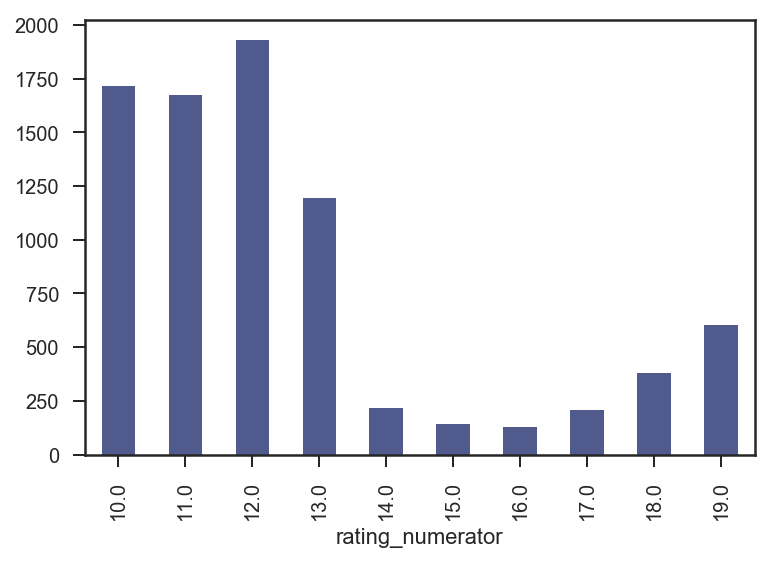

In [62]:
# plot the number of ratings out of 10
# get only ratings from 10 to 19
df_rating = df_new.query('rating_numerator < 20')
rating_count = df_rating.groupby('rating_numerator').count()['tweet_id']
rating_count.plot(kind='bar', color='#505A8C');

After eliminating a multitude of outliers, which can be an indication that a dog is extremely cute or merely a misrepresented value, it seems the majority of dogs get a rating between 10 and 13 out of 10.

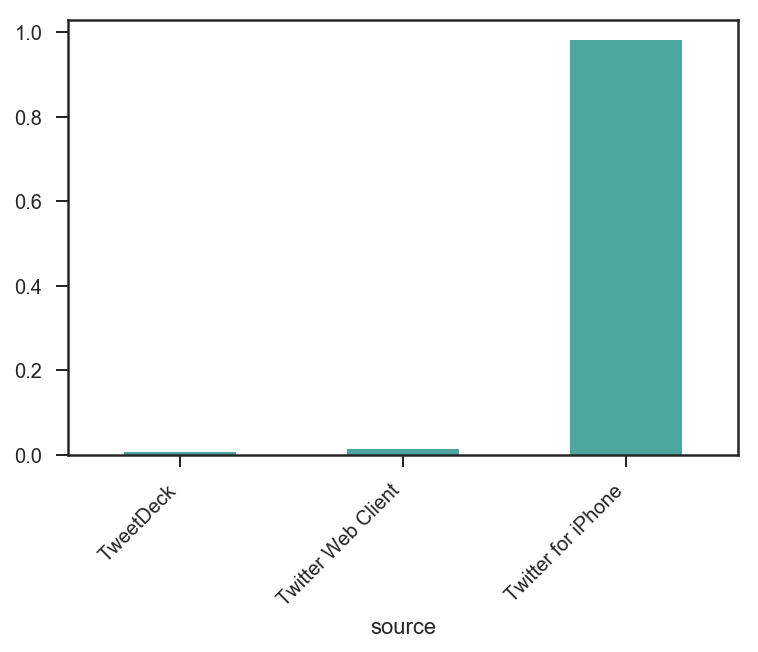

In [63]:
# plot the count of each source in the dataset
source_count = df_new.groupby('source').count()['tweet_id']
source_prop = source_count/sum(source_count)
source_prop.plot(kind='bar', color='#4CA69F', rot=45)
plt.xticks(ha='right');

In proportion to the other sources, iphone seems to be the most frequently sourced.

In [58]:
# observe statistic summary
df_new.describe()

,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,predict1_conf,predict2_conf,predict3_conf
count,8.800000e+01,8.800000e+01,3.000000e+02,3.000000e+02,8264.000000,8264.0,8272.000000,8272.000000,8272.000000,8272.000000,8.272000e+03,8.272000e+03
mean,6.955805e+17,4.196984e+09,7.628386e+17,1.049949e+16,14.273959,10.0,2822.762089,8459.404739,1.203578,0.594944,1.345462e-01,6.028703e-02
std,4.250300e+16,0.000000e+00,5.783830e+16,9.047094e+16,40.708710,0.0,4905.761520,12727.995995,0.562089,0.271152,1.007370e-01,5.093904e-02
min,6.671522e+17,4.196984e+09,6.675094e+17,7.832140e+05,10.000000,10.0,12.000000,0.000000,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.717299e+17,4.196984e+09,7.116948e+17,4.196984e+09,11.000000,10.0,600.750000,1611.000000,1.000000,0.364571,5.352722e-02,1.616933e-02
50%,6.756022e+17,4.196984e+09,7.761133e+17,4.196984e+09,12.000000,10.0,1329.000000,3726.000000,1.000000,0.588620,1.181350e-01,4.933745e-02
75%,7.030419e+17,4.196984e+09,8.001414e+17,4.196984e+09,13.000000,10.0,3259.250000,10599.750000,1.000000,0.845599,1.955618e-01,9.198323e-02
max,8.558181e+17,4.196984e+09,8.768508e+17,7.874618e+17,1776.000000,10.0,84164.000000,164979.000000,4.000000,1.000000,4.880140e-01,2.734190e-01


Observing the data statistically, we can see that the maximum rating ever published is 1776/10. Was the account operator being overzealous? or was it merely a mistake?

Also, we find that the engagement rate is quite high with retweet count reaching 84164 maximum, and favorite count reaching 164979. However, on average likes go up to 12727 on average, and retweets are at 4905 on average.

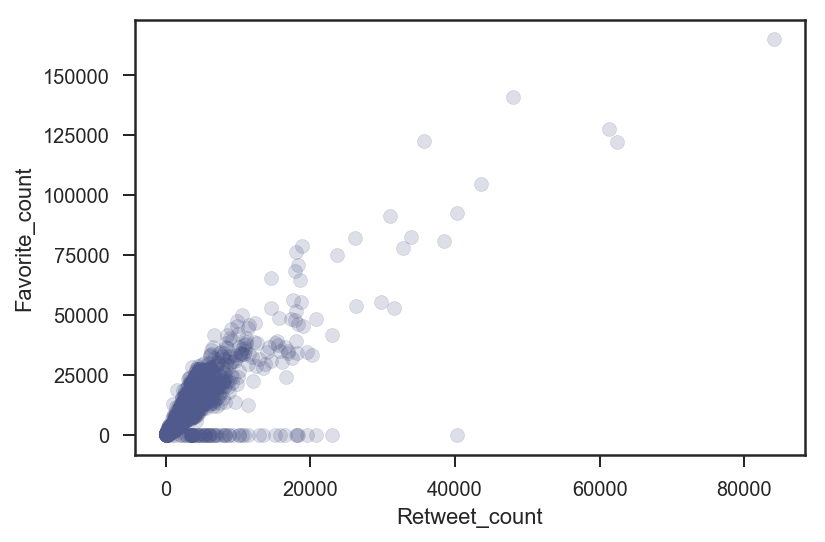

In [68]:
# plot retweet_count vs favorite_count
plt.scatter(df_new['retweet_count'], df_new['favorite_count'], color='#505A8C', alpha=0.05)
plt.xlabel('Retweet_count')
plt.ylabel('Favorite_count');

Disregarding outliers, generally, as the number of retweets increase, the number of likes increase. There's for sure a positive relationship between the two.

**Step #2:** Final visualization

In [56]:
# get only finite values (no NA)
df_new = df_new[np.isfinite(df_new['retweet_count'])]

# get only counts greater than 10
df_re_fave = df_new[(df_new['retweet_count'] > 10) & (df_new['favorite_count'] > 10)]

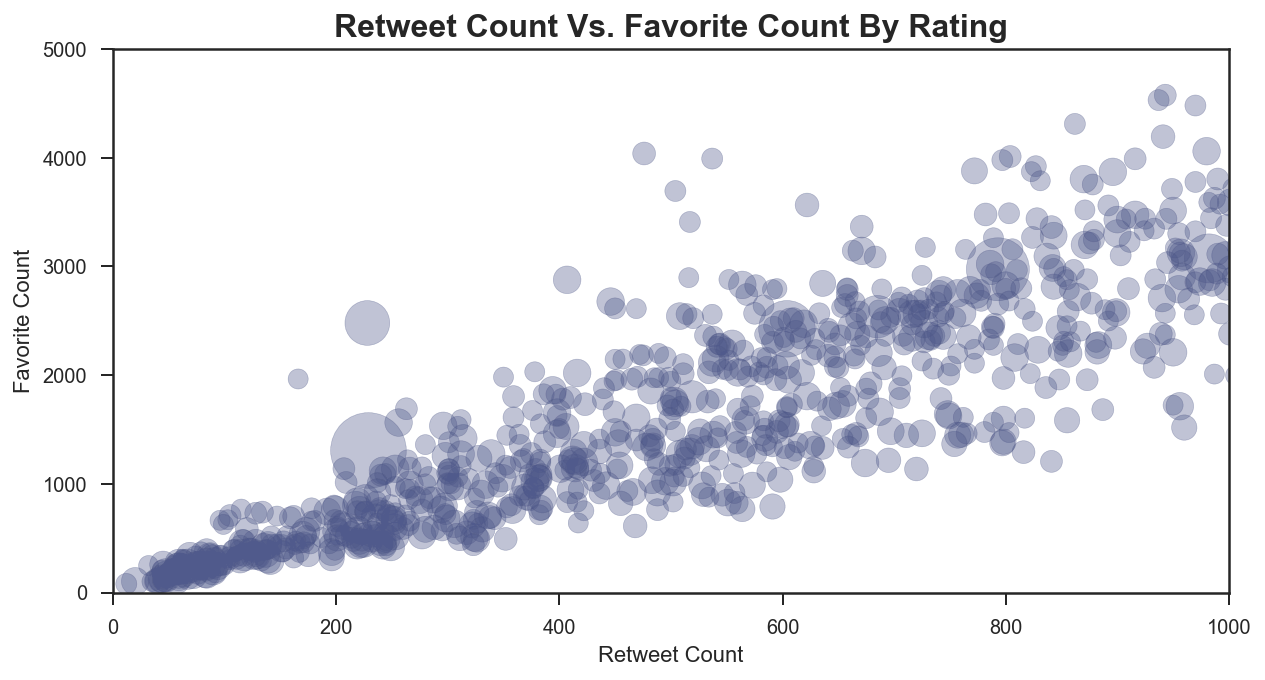

In [60]:
# plot retweet_count vs favorite_count by rating
fig, ax = plt.subplots(figsize=(10, 5))
ax.scatter(df_re_fave['retweet_count'], df_re_fave['favorite_count'], 
            alpha=0.1, s=df_re_fave['rating_numerator']*10, color='#505A8C');

# add limits, labels, and title
ax.set_xlim(0, 1000)
ax.set_ylim(0, 5000)
ax.set_xlabel('Retweet Count')
ax.set_ylabel('Favorite Count')
ax.set_title('Retweet Count Vs. Favorite Count By Rating', fontsize=16, fontweight='bold');

There's a strong correlation between the number of retweets and the number of likes in the beginning but the correlation strength seems to decrease as both values increase. This is generally a normal pattern witnessed on Twitter.

## Resources
- get tweets with id: https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id
- handling exceptions: https://wiki.python.org/moin/HandlingExceptions
- time elapsed measurement: https://stackoverflow.com/questions/7370801/measure-time-elapsed-in-python
- Twitter rate limit notifier: http://docs.tweepy.org/en/v3.2.0/api.html#API
- error handling: https://stackoverflow.com/questions/17157753/get-the-error-code-from-tweepy-exception-instance
- writing and reading json in python: https://stackabuse.com/reading-and-writing-json-to-a-file-in-python/
- writing json object line by line: https://stackoverflow.com/questions/17055117/python-json-dump-append-to-txt-with-each-variable-on-new-line
- parsing empty strings to int: https://stackoverflow.com/questions/40790031/pandas-to-numeric-find-out-which-string-it-was-unable-to-parse
- x-axis ticks rotation: https://stackoverflow.com/questions/32244019/how-to-rotate-x-axis-tick-labels-in-pandas-barplot